# Disease Prediction based on Symtoms

In [1]:
#Importing Libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os

In [2]:
#List of the symptoms is listed here in list l1.

l1=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
    'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
    'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
    'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
    'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
    'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
    'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
    'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
    'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
    'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
    'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
    'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
    'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
    'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
    'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
    'yellow_crust_ooze']

In [3]:
#List of Diseases is listed in list disease.

disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

#disease = [df['prognosis'].unique()]
#print(disease)

In [4]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
#Reading the training .csv file
df=pd.read_csv("training.csv")
DF= pd.read_csv('training.csv', index_col='prognosis')
#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
#df.head()
DF.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fungal infection,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [8]:
# Scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


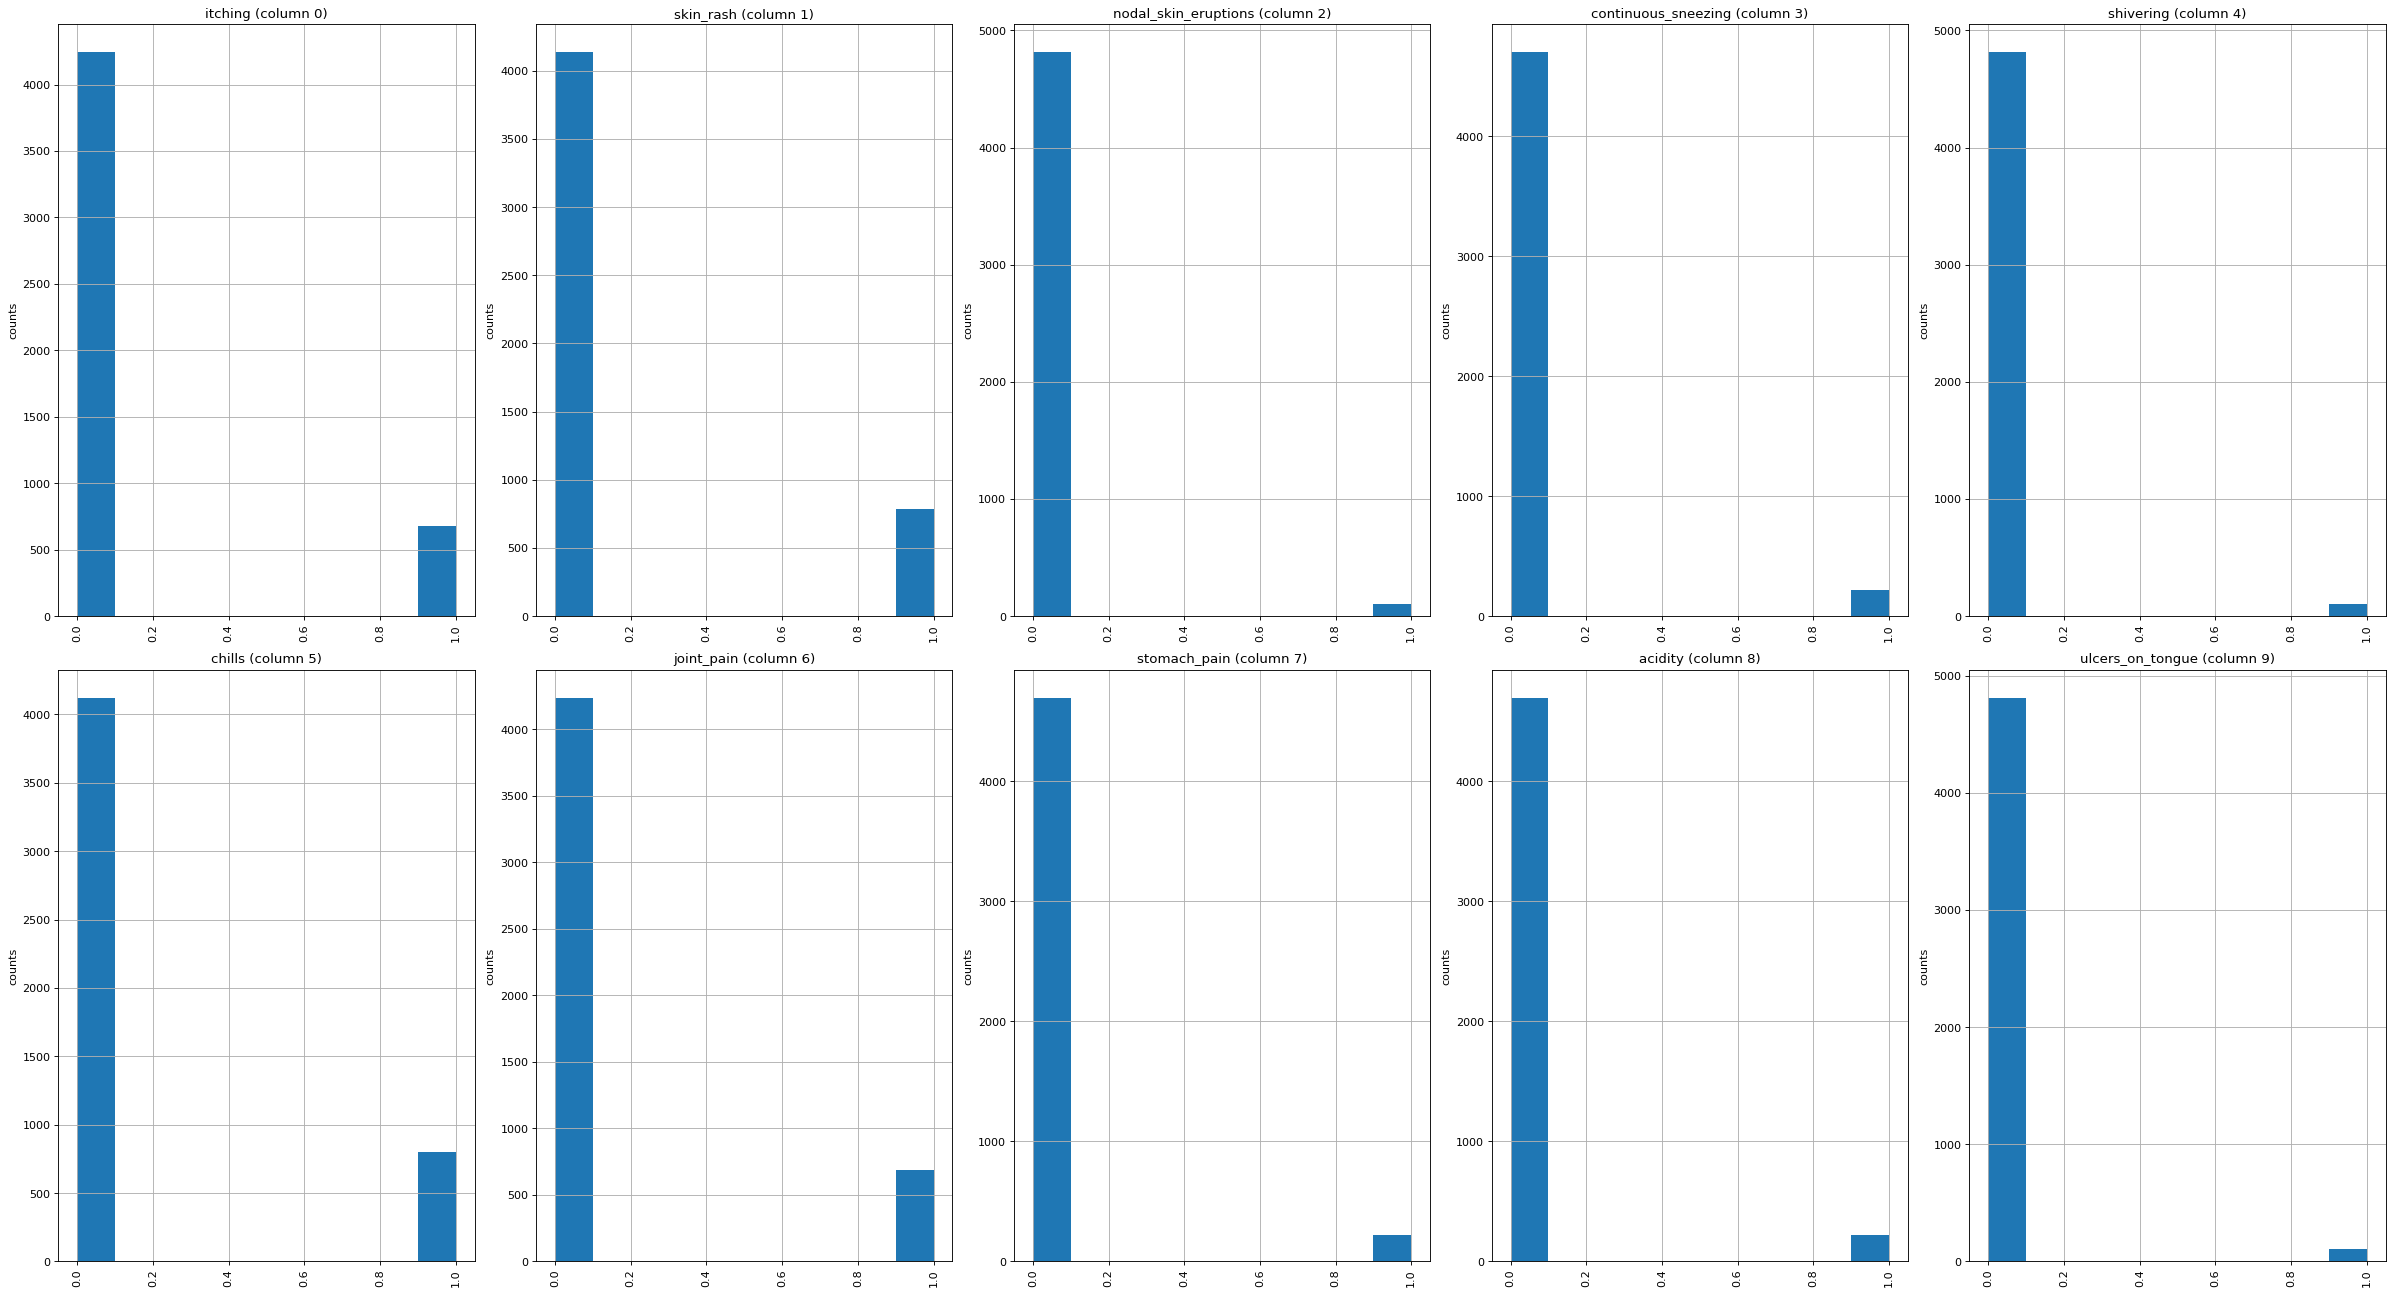

In [9]:
plotPerColumnDistribution(df, 10, 5)

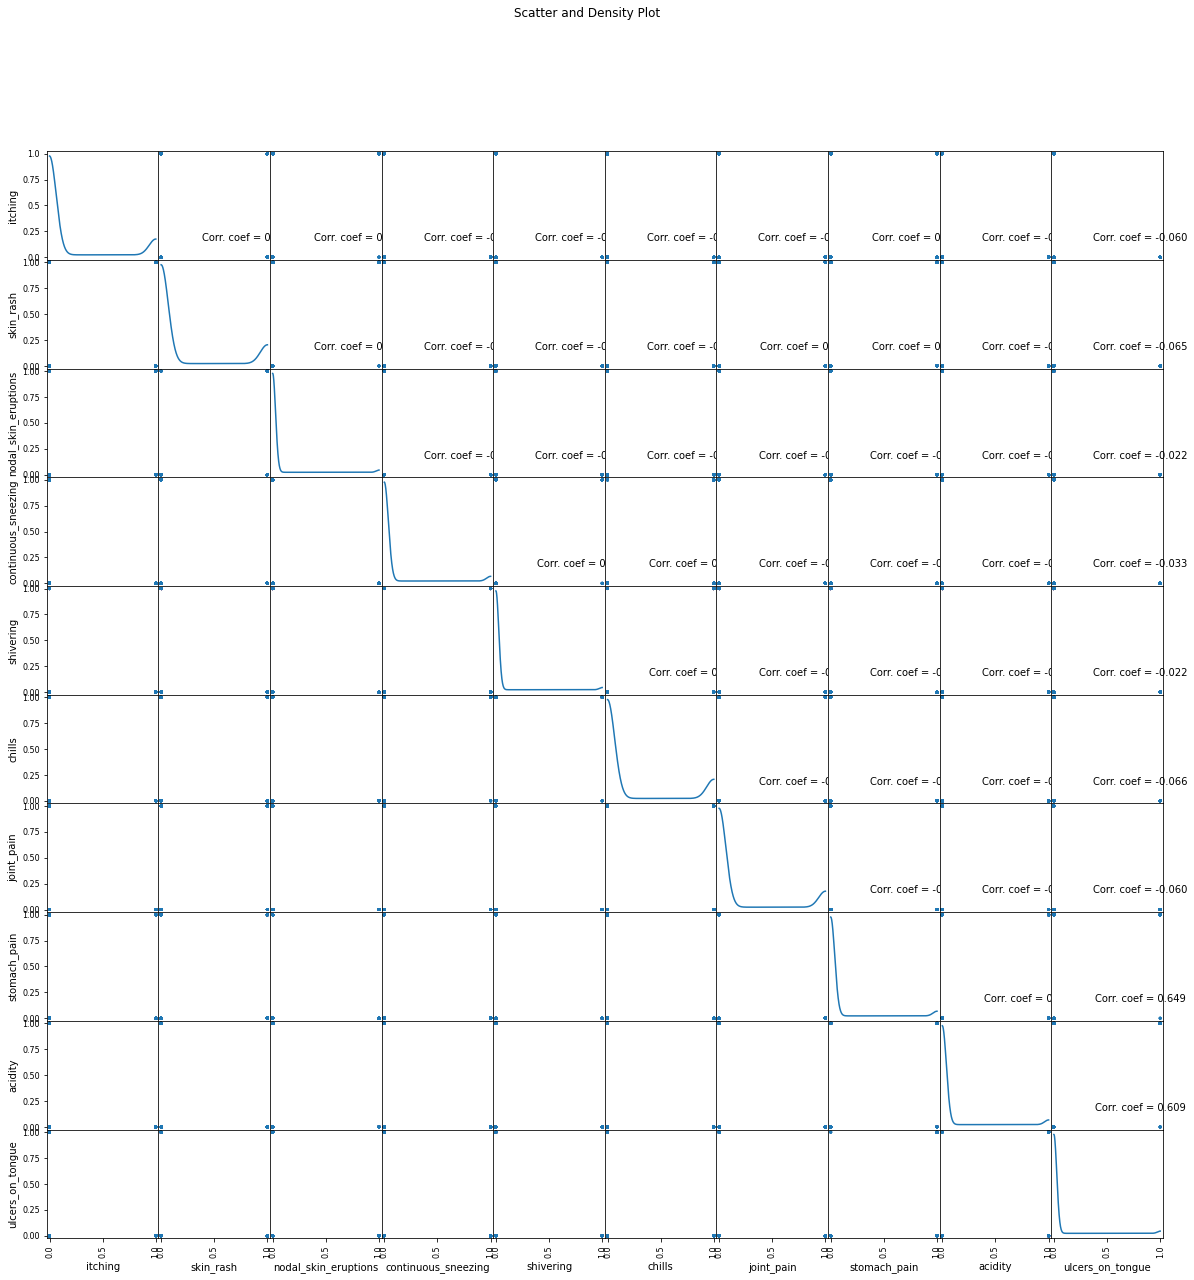

In [10]:
plotScatterMatrix(df, 20, 10)

In [11]:
X= df[l1]
y = df[["prognosis"]]
np.ravel(y)
print(X)

      back_pain  constipation  ...  red_sore_around_nose  yellow_crust_ooze
0             0             0  ...                     0                  0
1             0             0  ...                     0                  0
2             0             0  ...                     0                  0
3             0             0  ...                     0                  0
4             0             0  ...                     0                  0
...         ...           ...  ...                   ...                ...
4915          0             0  ...                     0                  0
4916          0             0  ...                     0                  0
4917          0             0  ...                     0                  0
4918          0             0  ...                     0                  0
4919          0             0  ...                     1                  1

[4920 rows x 95 columns]


In [12]:
print(y)

      prognosis
0             0
1             0
2             0
3             0
4             0
...         ...
4915         36
4916         37
4917         38
4918         39
4919         40

[4920 rows x 1 columns]


In [14]:
#Reading the  testing.csv file
tr=pd.read_csv("testing.csv")

#Using inbuilt function replace in pandas for replacing the values

tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
tr.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


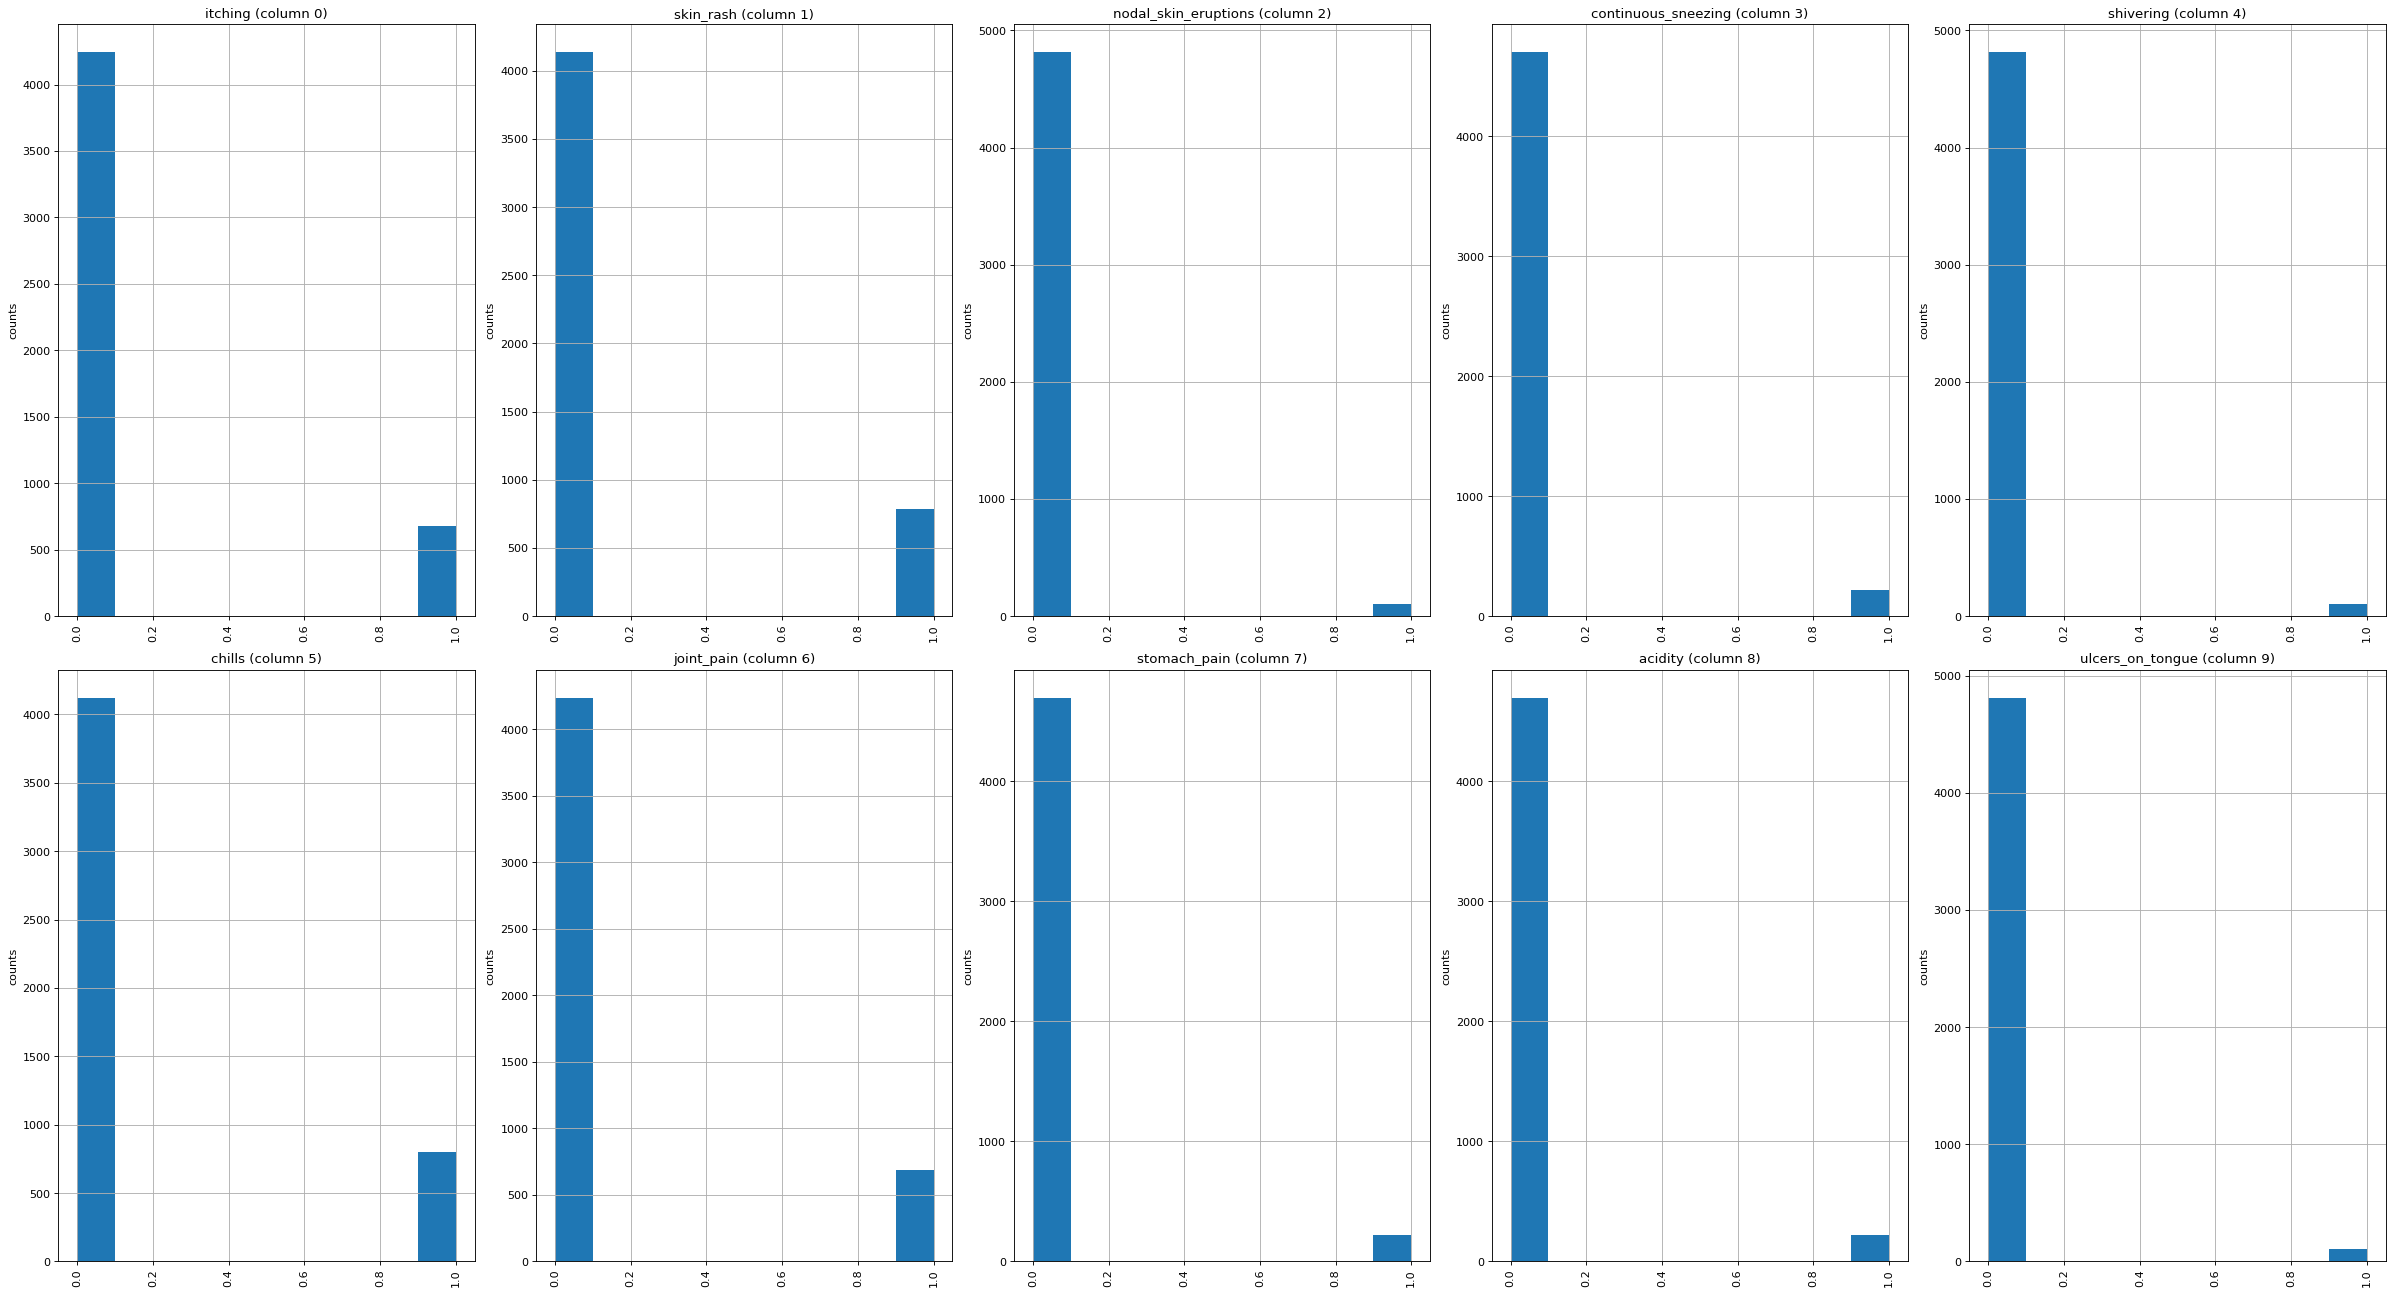

In [15]:
plotPerColumnDistribution(tr, 10, 5)

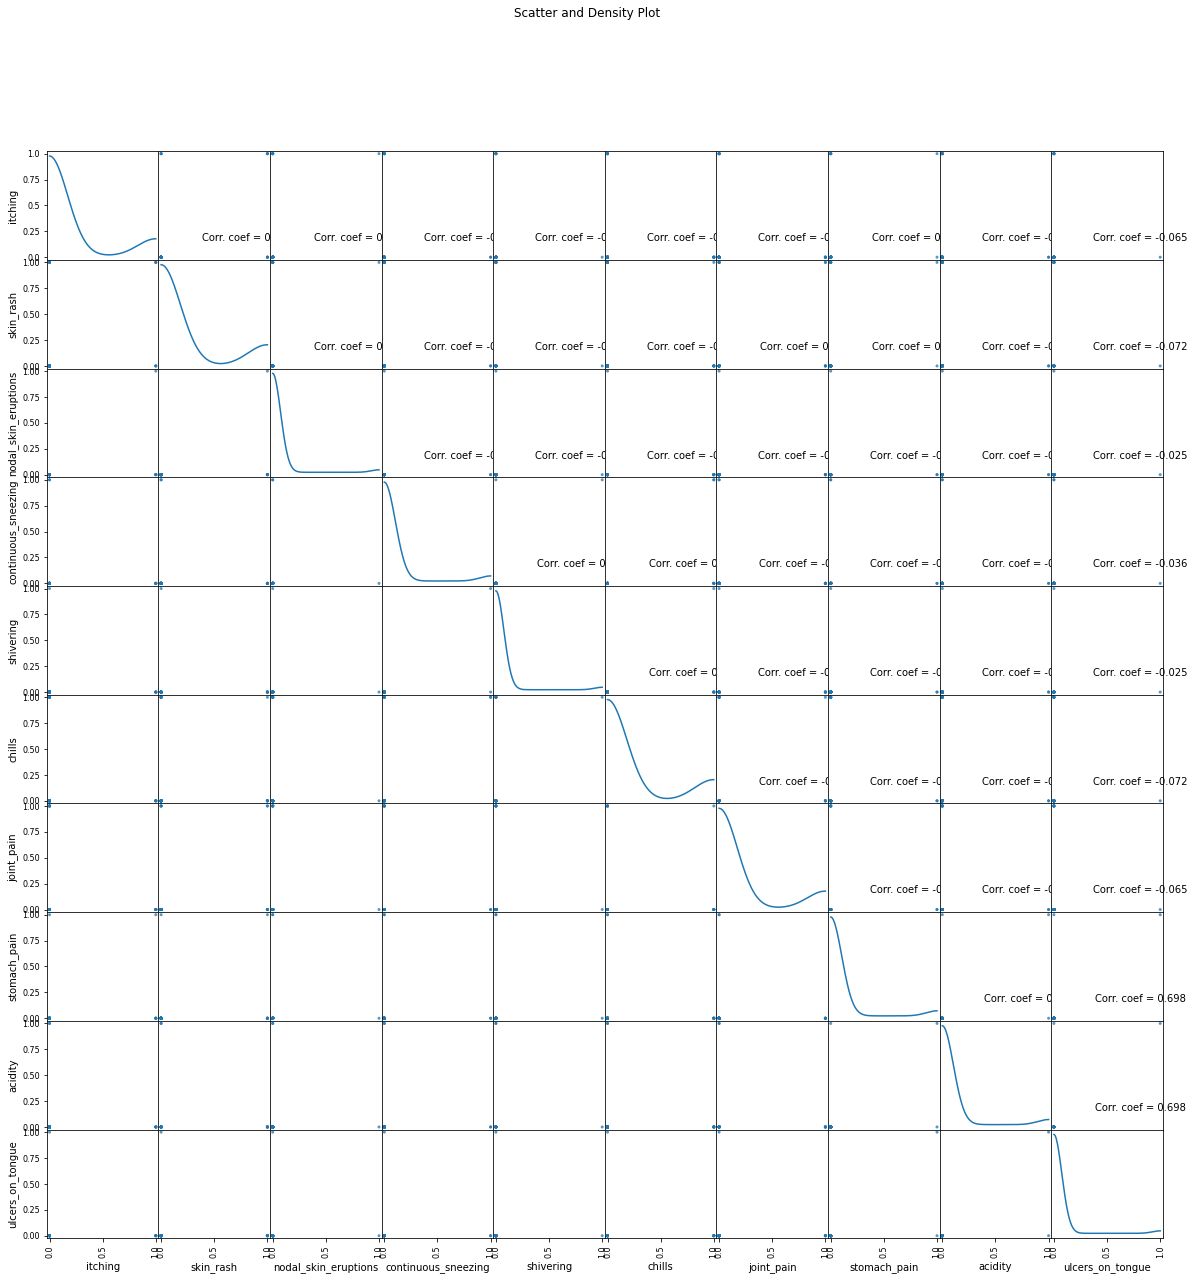

In [16]:
plotScatterMatrix(tr, 20, 10)

In [17]:
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)

    back_pain  constipation  ...  red_sore_around_nose  yellow_crust_ooze
0           0             0  ...                     0                  0
1           0             0  ...                     0                  0
2           0             0  ...                     0                  0
3           0             0  ...                     0                  0
4           0             0  ...                     0                  0
5           0             0  ...                     0                  0
6           0             0  ...                     0                  0
7           0             0  ...                     0                  0
8           0             0  ...                     0                  0
9           0             0  ...                     0                  0
10          0             0  ...                     0                  0
11          0             0  ...                     0                  0
12          1             0  ...      

In [18]:
print(y_test)

    prognosis
0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10
11         11
12         12
13         13
14         14
15         15
16         16
17         17
18         18
19         19
20         20
21         21
22         22
23         23
24         24
25         25
26         26
27         27
28         28
29         29
30         30
31         31
32         32
33         33
34         34
35         35
36         36
37         37
38         38
39         39
40         40


**To build the precision of the model, we utilized three distinctive algorithms which are as per the following**
* Decision Tree algorithm
* Random Forest algorithm
* KNearestNeighbour algorithm
* Naive Bayes algorithm

In [24]:
#list1 = DF['prognosis'].unique()
def scatterplt(disea):
    x = ((DF.loc[disea]).sum())#total sum of symptom reported for given disease
    x.drop(x[x==0].index,inplace=True)#droping symptoms with values 0
    print(x.values)
    y = x.keys()#storing nameof symptoms in y
    print(len(x))
    print(len(y))
    plt.title(disea)
    plt.scatter(y,x.values)
    plt.show()

def scatterinp(sym1,sym2,sym3,sym4,sym5):
    x = [sym1,sym2,sym3,sym4,sym5]#storing input symptoms in y
    y = [0,0,0,0,0]#creating and giving values to the input symptoms
    if(sym1!='Select Here'):
        y[0]=1
    if(sym2!='Select Here'):
        y[1]=1
    if(sym3!='Select Here'):
        y[2]=1
    if(sym4!='Select Here'):
        y[3]=1
    if(sym5!='Select Here'):
        y[4]=1
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()

# Decision Tree Algorithm

In [26]:
import tkinter as Tk
root = Tk()
pred1=StringVar()
def DecisionTree():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn import tree

        clf3 = tree.DecisionTreeClassifier() 
        clf3 = clf3.fit(X,y)

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf3.predict(X_test)
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf3.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break

    
        if (h=='yes'):
            pred1.set(" ")
            pred1.set(disease[a])
        else:
            pred1.set(" ")
            pred1.set("Not Found")
        #Creating the database if not exists named as database.db and creating table if not exists named as DecisionTree using sqlite3 
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS DecisionTree(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO DecisionTree(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred1.get()))
        conn.commit()  
        c.close() 
        conn.close()
        
        #printing scatter plot of input symptoms
        #printing scatter plot of disease predicted vs its symptoms
        scatterinp(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get())
        scatterplt(pred1.get())

TypeError: ignored

# Random Forest Algorithm

In [22]:
pred2=StringVar()
def randomforest():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X,np.ravel(y))

        # calculating accuracy 
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)
    
        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf4.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred2.set(" ")
            pred2.set(disease[a])
        else:
            pred2.set(" ")
            pred2.set("Not Found")
         #Creating the database if not exists named as database.db and creating table if not exists named as RandomForest using sqlite3
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO RandomForest(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred2.get()))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred2.get())

AttributeError: ignored

# KNearestNeighbour Algorithm

In [23]:
pred4=StringVar()
def KNN():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.neighbors import KNeighborsClassifier
        knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
        knn=knn.fit(X,np.ravel(y))
    
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=knn.predict(X_test)
        print("kNearest Neighbour")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = knn.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break


        if (h=='yes'):
            pred4.set(" ")
            pred4.set(disease[a])
        else:
            pred4.set(" ")
            pred4.set("Not Found")
         #Creating the database if not exists named as database.db and creating table if not exists named as KNearestNeighbour using sqlite3   
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS KNearestNeighbour(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO KNearestNeighbour(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred4.get()))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of disease predicted vs its symptoms
        
        scatterplt(pred4.get())

AttributeError: ignored

# Naive Bayes Algorithm

In [ ]:
pred3=StringVar()
def NaiveBayes():
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.naive_bayes import GaussianNB
        gnb = GaussianNB()
        gnb=gnb.fit(X,np.ravel(y))

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=gnb.predict(X_test)
        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = gnb.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred3.set(" ")
            pred3.set(disease[a])
        else:
            pred3.set(" ")
            pred3.set("Not Found")
         #Creating the database if not exists named as database.db and creating table if not exists named as NaiveBayes using sqlite3
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS NaiveBayes(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO NaiveBayes(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred3.get()))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred3.get())

# Building Graphical User Interface

In [27]:
#Tk class is used to create a root window
root.configure(background='Light Blue')
root.title('Smart Disease Predictor System')
root.resizable(0,0)

NameError: ignored

In [ ]:
Symptom1 = StringVar()
Symptom1.set("Select Here")

Symptom2 = StringVar()
Symptom2.set("Select Here")

Symptom3 = StringVar()
Symptom3.set("Select Here")

Symptom4 = StringVar()
Symptom4.set("Select Here")

Symptom5 = StringVar()
Symptom5.set("Select Here")
Name = StringVar()

In [ ]:
prev_win=None
def Reset():
    global prev_win

    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")
    NameEn.delete(first=0,last=100)
    pred1.set(" ")
    pred2.set(" ")
    pred3.set(" ")
    pred4.set(" ")
    try:
        prev_win.destroy()
        prev_win=None
    except AttributeError:
        pass

In [ ]:
from tkinter import messagebox
def Exit():
    qExit=messagebox.askyesno("System","Do you want to exit the system")
    
    if qExit:
        root.destroy()
        exit()

In [ ]:
w2 = Label(root, justify=CENTER, text="Disease Predictor using Machine Learning ", fg="Black", bg="Light Blue")
w2.config(font=("Times New Roman", 30 ,"bold italic"))
w2.grid(row=1, column=1, columnspan=3, padx=100)
w2 = Label(root, justify=CENTER, text="A Project by Team Goal Diggers", fg="Black", bg="Light Blue")
w2.config(font=("Times New Roman", 30 , "bold italic"))
w2.grid(row=2, column=1, columnspan=3, padx=100)

In [ ]:
# labels
NameLb = Label(root, text="Name of the Patient", fg="White", bg="black")
NameLb.config(font=("Times New Roman", 15 , "bold italic"))
NameLb.grid(row=6, column=1, pady=15, sticky=W)

In [ ]:

#Creating Labels for the symtoms

S1Lb = Label(root, text="Symptom 1", fg="yellow", bg="black")
S1Lb.config(font=("Times New Roman", 15 , "bold italic"))
S1Lb.grid(row=7, column=1, pady=10, sticky=W)

S2Lb = Label(root, text="Symptom 2", fg="yellow", bg="black")
S2Lb.config(font=("Times New Roman", 15 , "bold italic"))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root, text="Symptom 3", fg="yellow", bg="black")
S3Lb.config(font=("Times New Roman", 15 , "bold italic"))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)

S4Lb = Label(root, text="Symptom 4", fg="yellow", bg="black")
S4Lb.config(font=("Times New Roman", 15 , "bold italic"))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root, text="Symptom 5", fg="yellow", bg="black")
S5Lb.config(font=("Times New Roman", 15 , "bold italic"))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

In [ ]:
#Labels for the different algorithms
lrLb = Label(root, text="DecisionTree", fg="white", bg="red")
lrLb.config(font=("Times New Roman", 15 , "bold italic"))
lrLb.grid(row=15, column=1, pady=10,sticky=W)

destreeLb = Label(root, text="RandomForest", fg="white", bg="Blue")
destreeLb.config(font=("Times New Roman", 15 , "bold italic"))
destreeLb.grid(row=17, column=1, pady=10, sticky=W)

ranfLb = Label(root, text="NaiveBayes", fg="white", bg="Green")
ranfLb.config(font=("Times New Roman", 15 , "bold italic"))
ranfLb.grid(row=19, column=1, pady=10, sticky=W)

knnLb = Label(root, text="kNearestNeighbour", fg="white", bg="Black")
knnLb.config(font=("Times New Roman",15,"bold italic"))
knnLb.grid(row=21, column=1, pady=10, sticky=W)
OPTIONS = sorted(l1)

In [ ]:
#Taking name as input from user
S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=2)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=2)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=2)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=2)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=2)

In [ ]:
#Buttons for predicting the disease using different algorithms

dst = Button(root, text="DecisionTree", command=DecisionTree,bg="red",fg="White")
dst.config(font=("Times New Roman", 15 , "bold italic"))
dst.grid(row=7, column=3)

rnf = Button(root, text="Randomforest", command=randomforest,bg="blue",fg="White")
rnf.config(font=("Times New Roman", 15 , "bold italic"))
rnf.grid(row=8, column=3,padx=10)

lr = Button(root, text="NaiveBayes", command=NaiveBayes,bg="brown",fg="White")
lr.config(font=("Times New Roman", 15 , "bold italic"))
lr.grid(row=9, column=3,padx=10)

kn = Button(root, text="kNearestNeighbour", command=KNN,bg="black",fg="white")
kn.config(font=("Times",15,"bold italic"))
kn.grid(row=10, column=3,padx=10)

rs = Button(root,text="Reset Inputs", command=Reset,bg="purple",fg="white")
rs.config(font=("Times",15,"bold italic"))
rs.grid(row=11,column=3,padx=10)

ex = Button(root,text="Exit System", command=Exit,bg="yellow",fg="white")
ex.config(font=("Times",15,"bold italic"))
ex.grid(row=13,column=3,padx=10)

In [ ]:
#Showing the output of different aldorithms
t1 = Text(root, height=1, width=40,bg="white",fg="black")
t1.grid(row=15, column=2, padx=10)

t2 = Text(root, height=1, width=40,bg="white",fg="black")
t2.grid(row=17, column=2 , padx=10)

t3 = Text(root, height=1, width=40,bg="white",fg="black")
t3.grid(row=19, column=2 , padx=10)

In [ ]:
#calling this function because the application is ready to run
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Meghashyam\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-596-986cd3bd6eb0>", line 3, in randomforest
    if len(NameEn.get()) == 0:
  File "C:\Users\Meghashyam\anaconda3\lib\tkinter\__init__.py", line 3043, in get
    return self.tk.call(self._w, 'get')
_tkinter.TclError: invalid command name ".!entry"
